# Parse output of `hmmsearch` with single-copy genes on MAGS from EMP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
plt.rcParams.update({
    'figure.autolayout': True,
    'savefig.bbox': 'tight',
    'svg.fonttype': 'none',
    'font.sans-serif': 'Arial',
    'font.size': 12,
    'boxplot.medianprops.linewidth': 2,
    'boxplot.flierprops.markeredgecolor': 'none',
    'boxplot.flierprops.markersize': 5})

# Moody 2024

In [3]:
bins = np.loadtxt(f'./moody_2024/emp/bins.txt', dtype = str)
bins.shape

(793,)

Load output from hmmsearch

In [4]:
%%time
results = []
for bin in bins:
    # Load file
    with open(f'./moody_2024/emp/hits/moody_scg_hits_{bin}.txt', 'r') as f:
        for line in f:
            if not line.startswith('#') and len(line.strip()) != 0:
                tmp = re.sub('\s+', ' ', line.strip()).split(' ')
                # Ignore elements of description columns
                tmp = tmp[:18]
                tmp.append(bin)
                results.append(tmp)

CPU times: user 502 ms, sys: 47.5 ms, total: 550 ms
Wall time: 550 ms


In [5]:
len(results)

53546

In [6]:
df = pd.DataFrame(results, columns = ['target', 'acession_1', 'query', 'acession_2', 'e-value_full', 'score_full', 'bias_full',
                        'e-value_domain', 'score_domain', 'bias_domain',
                        'exp', 'reg', 'clu', 'ov', 'env', 'dom', 'rep', 'inc', 'bin'])
df.set_index('target', inplace = True)
df['genome'] = df.index.map(lambda x: x.split('_')[0])
df = df.astype({'score_full': 'float64'})

In [7]:
df.shape

(53546, 19)

In [8]:
df['bin'].unique().shape

(785,)

Some bins do not contain any marker genes

In [9]:
set(bins).difference(set(df['bin'].unique()))

{'Rohwer85_tundra.Metabat.Bin.8',
 'SaltMarsh.Metabat.Bin.1',
 'SaltMarsh.Metabat.Bin.11',
 'SaltMarsh.Metabat.Bin.31',
 'SaltMarsh.Metabat.Bin.47',
 'SaltMarsh.Metabat.Bin.54',
 'SaltMarsh.Metabat.Bin.58',
 'SaltMarsh.Metabat.Bin.63'}

Statistics

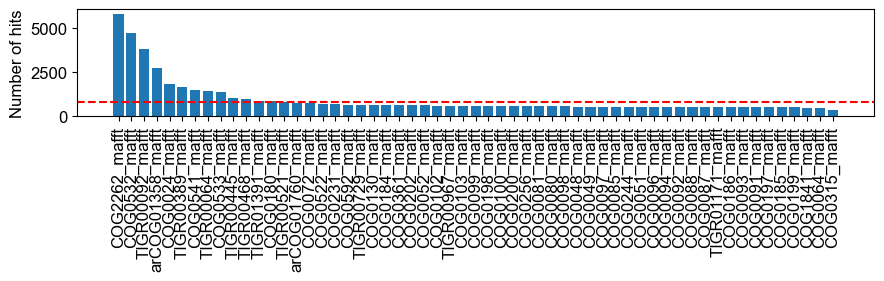

In [10]:
plt.figure(figsize = (9, 3))
datum = df['query'].value_counts()
plt.bar(datum.index, datum)
plt.xticks(rotation = 90)
plt.axhline(y = len(bins), color = 'r', ls = 'dashed')
plt.ylabel('Number of hits')
plt.show()

For each species and SCG take only the top/best hit

In [11]:
%%time
orfs = {}
genes = df['query'].unique()
for scg in genes:
    orfs[scg] = []
    filtered_df = df[df['query'] == scg]
    grouped = filtered_df.groupby('genome')
    for genome, group in grouped:
        if not group.empty:
            top_idx = group.sort_values(by = 'score_full', ascending = False).index[0]
            orfs[scg].append(top_idx)

CPU times: user 8.56 s, sys: 39.9 ms, total: 8.6 s
Wall time: 8.61 s


Save ORFS

In [12]:
len(orfs)

57

In [13]:
for scg, ofs in orfs.items():
    with open(f'./moody_2024/emp/orfs/{scg}.txt', 'w') as f:
        for of in ofs:
            f.write(f'{of}\n')

Save genes

In [14]:
np.savetxt(f'./moody_2024/emp/all_genes.txt', genes, fmt = '%s') 

Calculate the number of marker genes per genome

In [15]:
markers_per_genome = {}
for scg, ofs in orfs.items():
    for of in ofs:
        genome = of.split('_')[0]
        if genome not in markers_per_genome.keys():
            markers_per_genome[genome] = 1
        else:
            markers_per_genome[genome] += 1

Exclude those genome with less than k * 0.25 marker genes

In [16]:
int(len(orfs) * 0.25)

14

In [17]:
for genome, num_markers in markers_per_genome.items():
    if num_markers < int(len(orfs) * 0.25):
        print(genome)

BFJLNPEA
EIONDAHE
GLPMLFDF
HDPAMBID
JHIODLDC
MBNHMFML
BPEGOJDA
DAIJFKIA
FGNFOPDN
HKMMEPJP
LMKBONHO
NFMFJEON
OBFKJEIA
OJPPFNMI
BKEEBEBG
JIMJAPEB
MHEBJCLC
DBFJBALP
FLLAHDLE
DNFHLBHH
EOEMJJMG
FFHKOBHB
CFMGDACJ
BHLEOACE
GHMIGLJH
AFCKPBHF
ACAPDJNO
MBOFHHEL
EHBOIBLO
NELFGDAL


In [18]:
for scg, ofs in orfs.items():
    with open(f'./moody_2024/emp_min_markers_per_genome_14/orfs/{scg}.txt', 'w') as f:
        for of in ofs:
            if markers_per_genome[of.split('_')[0]] >= int(len(orfs) * 0.25):
                f.write(f'{of}\n')

# Martinez_Gutierrez

In [19]:
bins = np.loadtxt(f'./martinez_gutierrez/emp/bins.txt', dtype = str)
bins.shape

(793,)

Load output from HMMsearch

In [20]:
%%time
results = []
for bin in bins:
    # Load file
    with open(f'./martinez_gutierrez/emp/hits/martinez_scg_hits_{bin}.txt', 'r') as f:
        for line in f:
            if not line.startswith('#') and len(line.strip()) != 0:
                tmp = re.sub('\s+', ' ', line.strip()).split(' ')
                # Ignore elements of description columns
                tmp = tmp[:18]
                tmp.append(bin)
                results.append(tmp)

CPU times: user 421 ms, sys: 36.7 ms, total: 457 ms
Wall time: 457 ms


In [21]:
len(results)

40157

In [22]:
df = pd.DataFrame(results, columns = ['target', 'acession_1', 'query', 'acession_2', 'e-value_full', 'score_full', 'bias_full',
                        'e-value_domain', 'score_domain', 'bias_domain',
                        'exp', 'reg', 'clu', 'ov', 'env', 'dom', 'rep', 'inc', 'bin'])
df.set_index('target', inplace = True)
df['genome'] = df.index.map(lambda x: x.split('_')[0])
df = df.astype({'score_full': 'float64'})

In [23]:
df.shape

(40157, 19)

In [24]:
df['bin'].unique().shape

(775,)

Some bins do not contain any markers

In [25]:
set(bins).difference(set(df['bin'].unique()))

{'Myrold59_soil.Metabat.Bin.13',
 'Myrold59_soil.Metabat.Bin.18',
 'Myrold59_soil.Metabat.Bin.19',
 'Myrold59_soil.Metabat.Bin.22',
 'Rohwer85_tundra.Metabat.Bin.8',
 'SaltMarsh.Metabat.Bin.1',
 'SaltMarsh.Metabat.Bin.11',
 'SaltMarsh.Metabat.Bin.14',
 'SaltMarsh.Metabat.Bin.2',
 'SaltMarsh.Metabat.Bin.31',
 'SaltMarsh.Metabat.Bin.32',
 'SaltMarsh.Metabat.Bin.39',
 'SaltMarsh.Metabat.Bin.4',
 'SaltMarsh.Metabat.Bin.47',
 'SaltMarsh.Metabat.Bin.51',
 'SaltMarsh.Metabat.Bin.54',
 'SaltMarsh.Metabat.Bin.58',
 'SaltMarsh.Metabat.Bin.64'}

Statistics

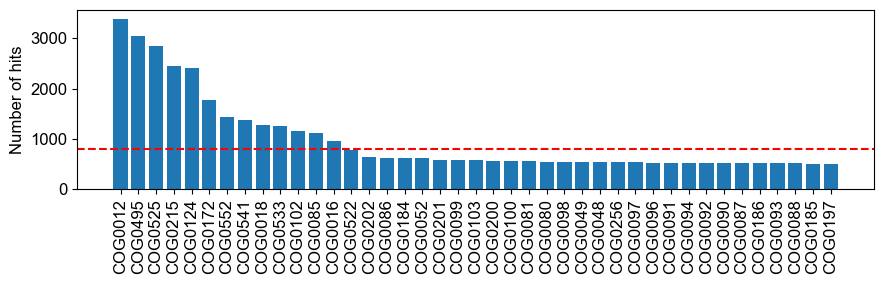

In [26]:
plt.figure(figsize = (9, 3))
datum = df['query'].value_counts()
plt.bar(datum.index, datum)
plt.xticks(rotation = 90)
plt.axhline(y = len(bins), color = 'r', ls = 'dashed')
plt.ylabel('Number of hits')
plt.show()

For each species and SCG take only the top/best hit

In [27]:
%%time
orfs = {}
genes = df['query'].unique()
for scg in genes:
    orfs[scg] = []
    filtered_df = df[df['query'] == scg]
    grouped = filtered_df.groupby('genome')
    for genome, group in grouped:
        if not group.empty:
            top_idx = group.sort_values(by = 'score_full', ascending = False).index[0]
            orfs[scg].append(top_idx)

CPU times: user 6.4 s, sys: 100 ms, total: 6.5 s
Wall time: 6.32 s


In [28]:
len(orfs)

41

In [29]:
for scg, ofs in orfs.items():
    with open(f'./martinez_gutierrez/emp/orfs/{scg}.txt', 'w') as f:
        for of in ofs:
            f.write(f'{of}\n')

Save genes

In [30]:
np.savetxt(f'./martinez_gutierrez/emp/all_genes.txt', genes, fmt = '%s') 

Calculate the number of marker genes per genome

In [31]:
markers_per_genome = {}
for scg, ofs in orfs.items():
    for of in ofs:
        genome = of.split('_')[0]
        if genome not in markers_per_genome.keys():
            markers_per_genome[genome] = 1
        else:
            markers_per_genome[genome] += 1

Exclude those genome with less than k * 0.25 marker genes

In [32]:
int(len(orfs) * 0.25)

10

In [33]:
for genome, num_markers in markers_per_genome.items():
    if num_markers < int(len(orfs) * 0.25):
        print(genome)

BFJLNPEA
BKEEBEBG
CFMGDACJ
EOEMJJMG
FFHKOBHB
GPOEIPNL
HEAEFHJG
HKMMEPJP
JCJGJKPG
MBNHMFML
MHEBJCLC
NELFGDAL
NFMFJEON
NPEBMLPL
OBFKJEIA
PIGADDHH
EIONDAHE
PGKLFHCO
FLLAHDLE
GLPMLFDF
OJPPFNMI
DNFHLBHH
BPEGOJDA
HDPAMBID
JCOLHFFK
AFCKPBHF


In [34]:
for scg, ofs in orfs.items():
    with open(f'./martinez_gutierrez/emp_min_markers_per_genome_10/orfs/{scg}.txt', 'w') as f:
        for of in ofs:
            if markers_per_genome[of.split('_')[0]] >= int(len(orfs) * 0.25):
                f.write(f'{of}\n')